In [1]:
!pip3 install opencv_python
!pip3 install numpy
!pip3 install matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# There are some problems in notebooks with cv2 imshow, use matplotlib instead.
# conversion needed
def plt_show(img, title=None):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
    plt.title(title)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

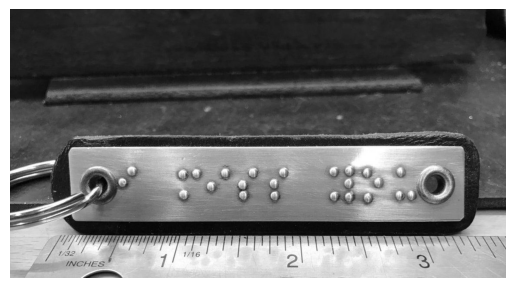

In [17]:
# Cargar imagen
image = cv2.imread("../images/Kaggle/0000852.jpg", cv2.IMREAD_GRAYSCALE)
plt_show(image)

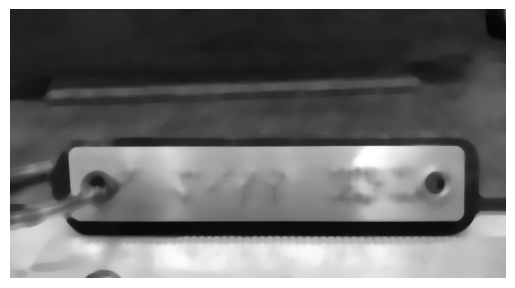

In [18]:
smoothed_image = cv2.medianBlur(image, 25)
plt_show(smoothed_image)

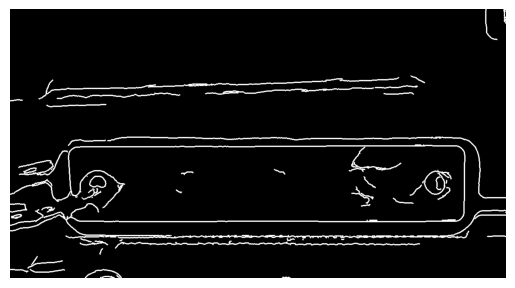

In [19]:
edges = cv2.Canny(smoothed_image, 25, 65)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
edges = cv2.dilate(edges, kernel, iterations=1)
plt_show(edges)


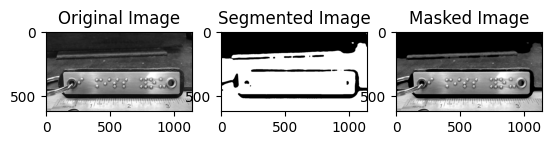

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


_, segmented_image = cv2.threshold(smoothed_image, 50, 100, cv2.THRESH_BINARY)


# Apply the mask: set the regions outside the mask to black
masked_image = cv2.bitwise_and(image, image, mask=segmented_image)

# Display the original, segmented, and masked images
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Masked Image')
plt.imshow((masked_image), cmap='gray')

plt.show()
